In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# load the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# print the top 5 rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
# the data types
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [4]:
# print the active geometry
world.geometry.name

'geometry'

In [5]:
# rename the column and set the geometry
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

# print the active geometry
world.geometry.name

'borders'

<AxesSubplot:>

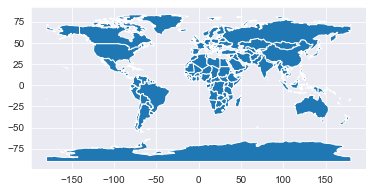

In [6]:
# plot the geometry
world.plot()

<AxesSubplot:>

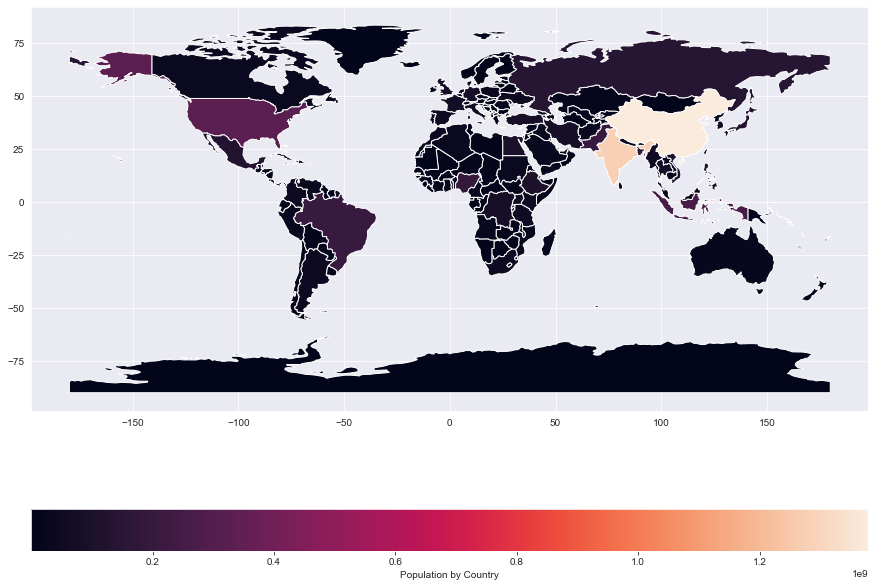

In [7]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

<AxesSubplot:>

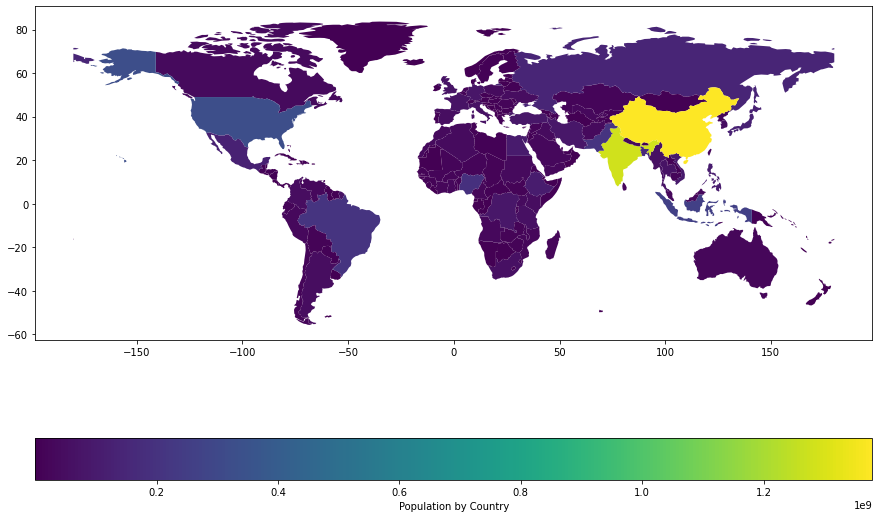

In [8]:
# filter the data-frame
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

In [22]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

KeyError: 'Calgary'

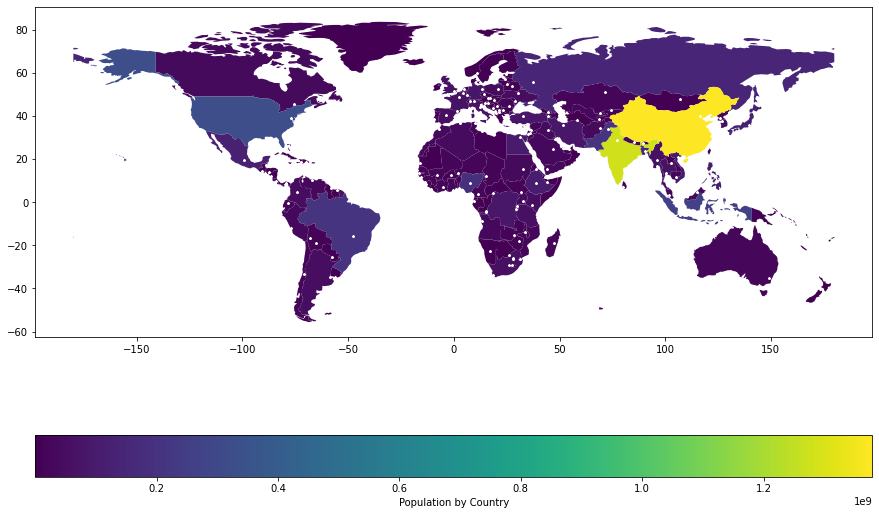

In [11]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# a layer of countries
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# a layer of cities
cities.plot(ax=ax ,marker='*', color='white', markersize=5)
plt.show()

In [19]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Polotical candidate voting pool analysis'),
    html.P("Select a candidate:"),
    dcc.RadioItems(
        id='candidate',
        options=["Joly", "Coderre", "Bergeron"],
        value="Coderre",
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("candidate", "value"))
def display_choropleth(candidate):
    df = px.data.election() # replace with your own data source
    geojson = px.data.election_geojson()
    fig = px.choropleth(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        projection="mercator", range_color=[0, 6500])
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig


# app.run_server(port=8090)  # Turn off reloader if inside Jupyter